In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.preprocessing import maxabs_scale

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv1D
from tensorflow.keras.layers import MaxPooling1D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '5'

In [4]:
base_dir = path.join('..', 'data')
data_dir = path.join(base_dir, 'data_speech_commands_v0.02')
 
train_txt = path.join(data_dir, 'wav_train_16words.txt')
val_txt = path.join(data_dir, 'wav_validation_16words.txt')
test_txt = path.join(data_dir, 'wav_test_16words.txt')

train_data = np.load(path.join(data_dir, 'wav_train_data.npz'))
val_data = np.load(path.join(data_dir, 'wav_validation_data.npz'))
test_data = np.load(path.join(data_dir, 'wav_test_data.npz'))

In [ ]:
x_train = train_data['x_train']
y_train = train_data['y_train']
x_val = val_data['x_val']
y_val = val_data['y_val']
x_test = test_data['x_test']
y_test = test_data['y_test']
y_table = test_data['table']

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape, y_table.shape

((36805, 16000, 1),
 (36805,),
 (4293, 16000, 1),
 (4293,),
 (4815, 16000, 1),
 (4815,),
 (16, 2))

In [ ]:
input_shape = x_test[0].shape
output_size = y_table.shape[0]

In [ ]:
x_train_abs = np.asarray([maxabs_scale(wav) for wav in x_train])
y_train_onehot = np.asarray([to_categorical(label, output_size) for label in y_train])
del x_train, y_train

x_val_abs = np.asarray([maxabs_scale(wav) for wav in x_val])
y_val_onehot = np.asarray([to_categorical(label, output_size) for label in y_val])
del x_val, y_val

x_test_abs = np.asarray([maxabs_scale(wav) for wav in x_test])
y_test_onehot = np.asarray([to_categorical(label, output_size) for label in y_test])
del x_test, y_test

In [ ]:
def build_1d_cnn_only_conv_conv_5_BN(conv_num=1):
    model=Sequential()
    model.add(Conv1D (kernel_size=5, filters=8, strides=1, padding='valid', input_shape=input_shape)) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=3, strides=3, padding='same'))
    
    for i in range(conv_num-1):
        model.add(Conv1D (kernel_size=5, filters=8*(2**(i+1)), strides=1, padding='valid'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(MaxPooling1D(pool_size=3, strides=3, padding='same'))

    model.add(Flatten())
    model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax' ))
    
    return model

In [ ]:
for i in range(1, 9):
    model = build_1d_cnn_only_conv_conv_5_BN(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 15996, 8)          48        
_________________________________________________________________
batch_normalization_v1 (Batc (None, 15996, 8)          32        
_________________________________________________________________
activation (Activation)      (None, 15996, 8)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5332, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 42656)             0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 42656)             170624    
_________________________________________________________________
dens

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 15996, 8)          48        
_________________________________________________________________
batch_normalization_v1_14 (B (None, 15996, 8)          32        
_________________________________________________________________
activation_10 (Activation)   (None, 15996, 8)          0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 5332, 8)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 5328, 16)          656       
_________________________________________________________________
batch_normalization_v1_15 (B (None, 5328, 16)          64        
_________________________________________________________________
activation_11 (Activation)   (None, 5328, 16)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 15996, 8)          48        
_________________________________________________________________
batch_normalization_v1_35 (B (None, 15996, 8)          32        
_________________________________________________________________
activation_28 (Activation)   (None, 15996, 8)          0         
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 5332, 8)           0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 5328, 16)          656       
_________________________________________________________________
batch_normalization_v1_36 (B (None, 5328, 16)          64        
_________________________________________________________________
activation_29 (Activation)   (None, 5328, 16)          0         
__________

Train on 36805 samples, validate on 4293 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
36608/36805 [============================>.] - ETA: 0s - loss: 2.7839 - acc: 0.2244
Epoch 00001: val_loss improved from inf to 2.51169, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_BN_1_conv_checkpoint/001-2.5117.hdf5
36805/36805 [==============================] - 11s 290us/sample - loss: 2.7835 - acc: 0.2245 - val_loss: 2.5117 - val_acc: 0.2339
Epoch 2/500
36672/36805 [============================>.] - ETA: 0s - loss: 2.1164 - acc: 0.3710
Epoch 00002: val_loss did not improve from 2.51169
36805/36805 [==============================] - 9s 235us/sample - loss: 2.1168 - acc: 0.3710 - val_loss: 2.6079 - val_acc: 0.2648
Epoch 3/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.7943 - acc: 0.4532
Epoch 00003: val_loss did not improve from 2.51169
36805/36805 [==============================] - 8s 229us/sample - loss: 1.7953 - acc: 0.4530 - val_loss: 2.58

36672/36805 [============================>.] - ETA: 0s - loss: 0.3466 - acc: 0.9075
Epoch 00029: val_loss did not improve from 2.51169
36805/36805 [==============================] - 8s 228us/sample - loss: 0.3470 - acc: 0.9073 - val_loss: 4.2474 - val_acc: 0.2541
Epoch 30/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.3405 - acc: 0.9054
Epoch 00030: val_loss did not improve from 2.51169
36805/36805 [==============================] - 8s 229us/sample - loss: 0.3409 - acc: 0.9054 - val_loss: 3.9107 - val_acc: 0.2765
Epoch 31/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.3249 - acc: 0.9122
Epoch 00031: val_loss did not improve from 2.51169
36805/36805 [==============================] - 8s 228us/sample - loss: 0.3254 - acc: 0.9120 - val_loss: 3.9511 - val_acc: 0.2756
Epoch 32/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.3144 - acc: 0.9153
Epoch 00032: val_loss did not improve from 2.51169
36805/36805 [=====================

Epoch 59/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1674 - acc: 0.9580
Epoch 00059: val_loss did not improve from 2.51169
36805/36805 [==============================] - 8s 229us/sample - loss: 0.1676 - acc: 0.9579 - val_loss: 5.1339 - val_acc: 0.2567
Epoch 60/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1720 - acc: 0.9566
Epoch 00060: val_loss did not improve from 2.51169
36805/36805 [==============================] - 9s 232us/sample - loss: 0.1722 - acc: 0.9564 - val_loss: 4.8375 - val_acc: 0.2802
Epoch 61/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1630 - acc: 0.9599
Epoch 00061: val_loss did not improve from 2.51169
36805/36805 [==============================] - 8s 227us/sample - loss: 0.1633 - acc: 0.9598 - val_loss: 4.8350 - val_acc: 0.2763
Epoch 62/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1578 - acc: 0.9599
Epoch 00062: val_loss did not improve from 2.51169
36805/36805 [========

Epoch 89/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1124 - acc: 0.9711
Epoch 00089: val_loss did not improve from 2.51169
36805/36805 [==============================] - 8s 230us/sample - loss: 0.1124 - acc: 0.9712 - val_loss: 5.4321 - val_acc: 0.2746
Epoch 90/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1148 - acc: 0.9707
Epoch 00090: val_loss did not improve from 2.51169
36805/36805 [==============================] - 8s 229us/sample - loss: 0.1148 - acc: 0.9707 - val_loss: 5.4045 - val_acc: 0.2590
Epoch 91/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1112 - acc: 0.9725
Epoch 00091: val_loss did not improve from 2.51169
36805/36805 [==============================] - 8s 227us/sample - loss: 0.1115 - acc: 0.9725 - val_loss: 5.4382 - val_acc: 0.2621
Epoch 92/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1035 - acc: 0.9747
Epoch 00092: val_loss did not improve from 2.51169
36805/36805 [========

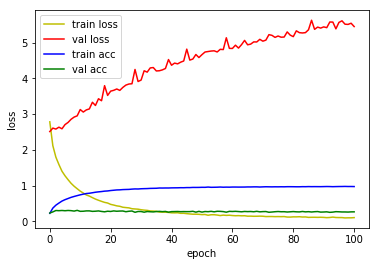

4815/4815 [==============================] - 1s 194us/sample - loss: 2.5298 - acc: 0.2301
Loss: 2.5297898799088143 Accuracy: 0.23011422

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36736/36805 [============================>.] - ETA: 0s - loss: 2.3514 - acc: 0.3178
Epoch 00001: val_loss improved from inf to 2.09724, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_BN_2_conv_checkpoint/001-2.0972.hdf5
36805/36805 [==============================] - 14s 376us/sample - loss: 2.3512 - acc: 0.3178 - val_loss: 2.0972 - val_acc: 0.3645
Epoch 2/500
36736/36805 [============================>.] - ETA: 0s - loss: 1.6364 - acc: 0.5045
Epoch 00002: val_loss improved from 2.09724 to 2.02854, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_BN_2_conv_checkpoint/002-2.0285.hdf5
36805/36805 [==============================] - 12s 313us/sample - loss: 1.6369 - acc: 0.5044 - val_loss: 2.0285 - val_acc: 0.4000
Epoch 3/500
36736/36805 [============================>.] - ETA: 0s

Epoch 29/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0832 - acc: 0.9860
Epoch 00029: val_loss did not improve from 1.91282
36805/36805 [==============================] - 11s 310us/sample - loss: 0.0832 - acc: 0.9861 - val_loss: 2.8642 - val_acc: 0.4482
Epoch 30/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0792 - acc: 0.9888
Epoch 00030: val_loss did not improve from 1.91282
36805/36805 [==============================] - 11s 308us/sample - loss: 0.0791 - acc: 0.9888 - val_loss: 2.8880 - val_acc: 0.4517
Epoch 31/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0725 - acc: 0.9886
Epoch 00031: val_loss did not improve from 1.91282
36805/36805 [==============================] - 12s 313us/sample - loss: 0.0725 - acc: 0.9886 - val_loss: 2.9244 - val_acc: 0.4547
Epoch 32/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0700 - acc: 0.9891
Epoch 00032: val_loss did not improve from 1.91282
36805/36805 [=====

Epoch 59/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0310 - acc: 0.9953
Epoch 00059: val_loss did not improve from 1.91282
36805/36805 [==============================] - 11s 310us/sample - loss: 0.0312 - acc: 0.9952 - val_loss: 3.4876 - val_acc: 0.4454
Epoch 60/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0354 - acc: 0.9939
Epoch 00060: val_loss did not improve from 1.91282
36805/36805 [==============================] - 11s 308us/sample - loss: 0.0354 - acc: 0.9939 - val_loss: 3.7002 - val_acc: 0.4368
Epoch 61/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0330 - acc: 0.9947
Epoch 00061: val_loss did not improve from 1.91282
36805/36805 [==============================] - 11s 309us/sample - loss: 0.0330 - acc: 0.9947 - val_loss: 3.6913 - val_acc: 0.4354
Epoch 62/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0326 - acc: 0.9942
Epoch 00062: val_loss did not improve from 1.91282
36805/36805 [=====

Epoch 89/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0273 - acc: 0.9956
Epoch 00089: val_loss did not improve from 1.91282
36805/36805 [==============================] - 11s 310us/sample - loss: 0.0275 - acc: 0.9955 - val_loss: 4.0833 - val_acc: 0.4300
Epoch 90/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0276 - acc: 0.9944
Epoch 00090: val_loss did not improve from 1.91282
36805/36805 [==============================] - 11s 310us/sample - loss: 0.0276 - acc: 0.9943 - val_loss: 4.0419 - val_acc: 0.4284
Epoch 91/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0226 - acc: 0.9964
Epoch 00091: val_loss did not improve from 1.91282
36805/36805 [==============================] - 11s 308us/sample - loss: 0.0226 - acc: 0.9964 - val_loss: 4.0974 - val_acc: 0.4277
Epoch 92/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0201 - acc: 0.9972
Epoch 00092: val_loss did not improve from 1.91282
36805/36805 [=====

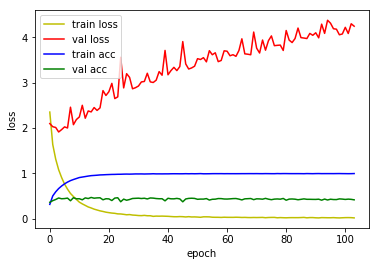

4815/4815 [==============================] - 1s 229us/sample - loss: 1.9663 - acc: 0.4320
Loss: 1.9662681654358702 Accuracy: 0.43198338

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.1152 - acc: 0.3607
Epoch 00001: val_loss improved from inf to 1.72444, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_BN_3_conv_checkpoint/001-1.7244.hdf5
36805/36805 [==============================] - 17s 470us/sample - loss: 2.1151 - acc: 0.3608 - val_loss: 1.7244 - val_acc: 0.4458
Epoch 2/500
36736/36805 [============================>.] - ETA: 0s - loss: 1.4620 - acc: 0.5500
Epoch 00002: val_loss improved from 1.72444 to 1.48501, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_BN_3_conv_checkpoint/002-1.4850.hdf5
36805/36805 [==============================] - 13s 364us/sample - loss: 1.4616 - acc: 0.5501 - val_loss: 1.4850 - val_acc: 0.5469
Epoch 3/500
36736/36805 [============================>.] - ETA: 0s

Epoch 29/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0629 - acc: 0.9915
Epoch 00029: val_loss did not improve from 1.33706
36805/36805 [==============================] - 13s 359us/sample - loss: 0.0632 - acc: 0.9914 - val_loss: 1.9584 - val_acc: 0.5919
Epoch 30/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0792 - acc: 0.9875
Epoch 00030: val_loss did not improve from 1.33706
36805/36805 [==============================] - 13s 361us/sample - loss: 0.0792 - acc: 0.9876 - val_loss: 1.8543 - val_acc: 0.6066
Epoch 31/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0496 - acc: 0.9951
Epoch 00031: val_loss did not improve from 1.33706
36805/36805 [==============================] - 13s 357us/sample - loss: 0.0496 - acc: 0.9950 - val_loss: 1.8672 - val_acc: 0.6108
Epoch 32/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0485 - acc: 0.9949
Epoch 00032: val_loss did not improve from 1.33706
36805/36805 [=====

Epoch 59/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0237 - acc: 0.9973
Epoch 00059: val_loss did not improve from 1.33706
36805/36805 [==============================] - 13s 359us/sample - loss: 0.0240 - acc: 0.9973 - val_loss: 2.2426 - val_acc: 0.6005
Epoch 60/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0253 - acc: 0.9968
Epoch 00060: val_loss did not improve from 1.33706
36805/36805 [==============================] - 13s 360us/sample - loss: 0.0252 - acc: 0.9968 - val_loss: 2.2319 - val_acc: 0.6061
Epoch 61/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0207 - acc: 0.9977
Epoch 00061: val_loss did not improve from 1.33706
36805/36805 [==============================] - 13s 359us/sample - loss: 0.0208 - acc: 0.9976 - val_loss: 2.5021 - val_acc: 0.5751
Epoch 62/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0244 - acc: 0.9966
Epoch 00062: val_loss did not improve from 1.33706
36805/36805 [=====

Epoch 89/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0166 - acc: 0.9973
Epoch 00089: val_loss did not improve from 1.33706
36805/36805 [==============================] - 13s 362us/sample - loss: 0.0166 - acc: 0.9973 - val_loss: 2.4795 - val_acc: 0.6026
Epoch 90/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0121 - acc: 0.9992
Epoch 00090: val_loss did not improve from 1.33706
36805/36805 [==============================] - 13s 361us/sample - loss: 0.0122 - acc: 0.9992 - val_loss: 2.6332 - val_acc: 0.5823
Epoch 91/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0140 - acc: 0.9981
Epoch 00091: val_loss did not improve from 1.33706
36805/36805 [==============================] - 13s 362us/sample - loss: 0.0140 - acc: 0.9982 - val_loss: 2.4534 - val_acc: 0.6028
Epoch 92/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0163 - acc: 0.9978
Epoch 00092: val_loss did not improve from 1.33706
36805/36805 [=====

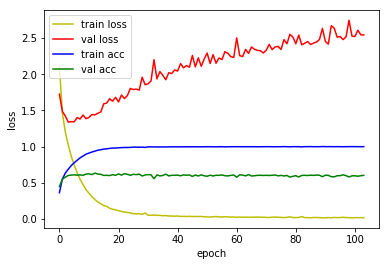

4815/4815 [==============================] - 1s 265us/sample - loss: 1.4184 - acc: 0.5705
Loss: 1.4183883005956253 Accuracy: 0.57050884

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.9357 - acc: 0.4126
Epoch 00001: val_loss improved from inf to 1.57671, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_BN_4_conv_checkpoint/001-1.5767.hdf5
36805/36805 [==============================] - 20s 545us/sample - loss: 1.9337 - acc: 0.4132 - val_loss: 1.5767 - val_acc: 0.4978
Epoch 2/500
36736/36805 [============================>.] - ETA: 0s - loss: 1.3166 - acc: 0.5986
Epoch 00002: val_loss improved from 1.57671 to 1.27661, saving model to model/checkpoint/1D_CNN_only_conv_conv_5_BN_4_conv_checkpoint/002-1.2766.hdf5
36805/36805 [==============================] - 15s 415us/sample - loss: 1.3165 - acc: 0.5988 - val_loss: 1.2766 - val_acc: 0.6166
Epoch 3/500
36736/36805 [============================>.] - ETA: 0s

36800/36805 [============================>.] - ETA: 0s - loss: 0.0739 - acc: 0.9891
Epoch 00028: val_loss did not improve from 1.07866
36805/36805 [==============================] - 15s 412us/sample - loss: 0.0739 - acc: 0.9890 - val_loss: 1.6367 - val_acc: 0.6587
Epoch 29/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0717 - acc: 0.9891
Epoch 00029: val_loss did not improve from 1.07866
36805/36805 [==============================] - 15s 410us/sample - loss: 0.0718 - acc: 0.9891 - val_loss: 1.3650 - val_acc: 0.6893
Epoch 30/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0676 - acc: 0.9907
Epoch 00030: val_loss did not improve from 1.07866
36805/36805 [==============================] - 15s 413us/sample - loss: 0.0677 - acc: 0.9907 - val_loss: 1.4215 - val_acc: 0.6876
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0624 - acc: 0.9911
Epoch 00031: val_loss did not improve from 1.07866
36805/36805 [==================

Epoch 58/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0311 - acc: 0.9953
Epoch 00058: val_loss did not improve from 1.07866
36805/36805 [==============================] - 15s 409us/sample - loss: 0.0311 - acc: 0.9953 - val_loss: 2.0466 - val_acc: 0.6366
Epoch 59/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0255 - acc: 0.9970
Epoch 00059: val_loss did not improve from 1.07866
36805/36805 [==============================] - 15s 409us/sample - loss: 0.0255 - acc: 0.9970 - val_loss: 1.7276 - val_acc: 0.6895
Epoch 60/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0268 - acc: 0.9964
Epoch 00060: val_loss did not improve from 1.07866
36805/36805 [==============================] - 15s 417us/sample - loss: 0.0268 - acc: 0.9963 - val_loss: 2.0544 - val_acc: 0.6355
Epoch 61/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0257 - acc: 0.9966
Epoch 00061: val_loss did not improve from 1.07866
36805/36805 [=====

In [ ]:
for i in range(1, 9):
    base = '1D_CNN_only_conv_conv_5_BN'
    model_name = base+'_{}_conv'.format(i)
    model = build_1d_cnn_only_conv_conv_5_BN(conv_num=i)
#         model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=100)
    hist = model.fit(x_train_abs, y_train_onehot, batch_size=64, epochs=500, 
                     validation_data=[x_val_abs, y_val_onehot], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [ ]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = '1D_CNN_only_conv_conv_5_BN'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(1, 9):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, accuracy, loss])+'\n')